```
pip install numpy pandas matplotlib opencv-contrib-python mlflow==2.14.1 setuptools supervision ultralytics transformers timm
```

In [1]:
import cv2
import matplotlib.pyplot as plt
import supervision as sv
import torch
from PIL import Image
from transformers import DetrImageProcessor, DetrForObjectDetection
import timm

In [2]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
image = Image.open("champi.png")
inputs = processor(images=image, return_tensors="pt")

In [9]:
with torch.no_grad():
    outputs = model(**inputs)

In [10]:
width, height = image.size
display(width)
display(height)

640

480

In [11]:
target_size = torch.tensor([[height, width]])
target_size

tensor([[480, 640]])

In [12]:
results = processor.post_process_object_detection(
    outputs=outputs, target_sizes=target_size)[0]

results

{'scores': tensor([0.7854]),
 'labels': tensor([53]),
 'boxes': tensor([[ 63.1457,  74.5972, 281.8959, 392.3910]])}

In [13]:
detections = sv.Detections.from_transformers(
    transformers_results=results,
    id2label=model.config.id2label)

detections

Detections(xyxy=array([[ 63.145706,  74.59721 , 281.89594 , 392.39096 ]], dtype=float32), mask=None, confidence=array([0.7854072], dtype=float32), class_id=array([53]), tracker_id=None, data={'class_name': array(['apple'], dtype='<U5')})

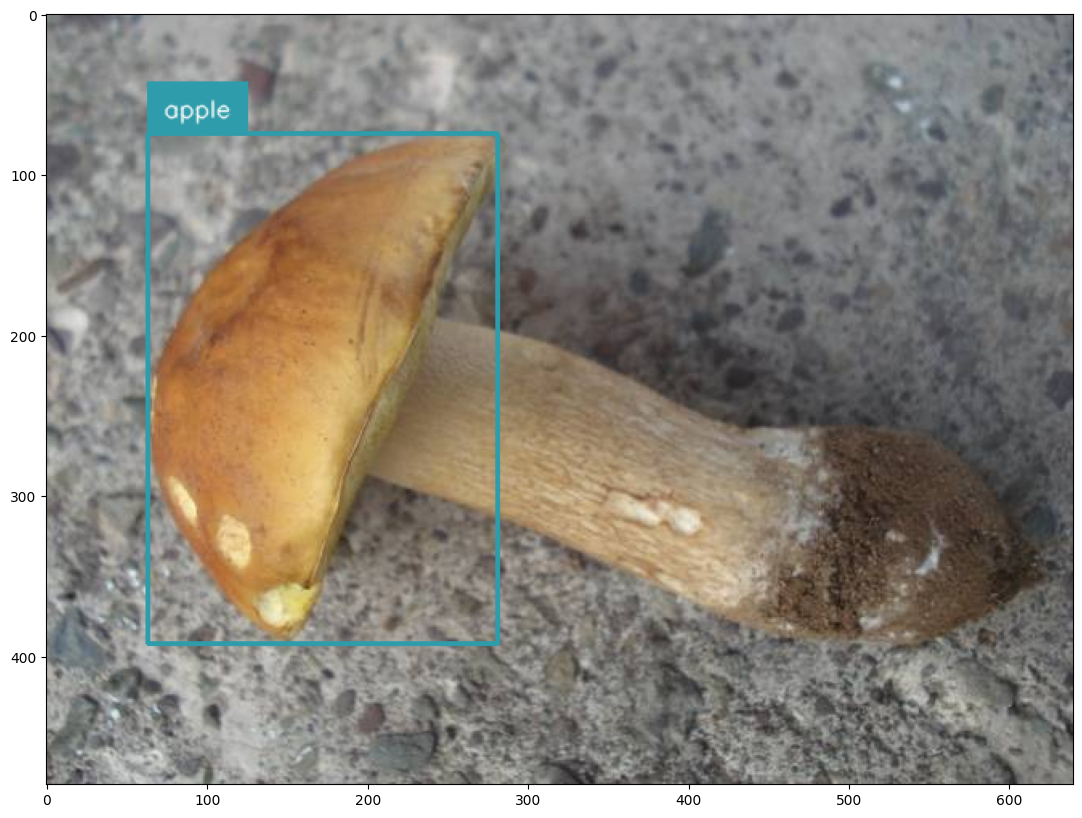

In [15]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

plt.figure(figsize=(15, 10))
plt.imshow(annotated_image)
plt.show();